In [1]:
import CMGDB_utils

import numpy as np
import time

## Leslie map examples

Define the Leslie map

In [2]:
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * np.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

Define a box map which takes a rectangle as input and returns a rectangle

In [3]:
def F(rect):
    return CMGDB_utils.BoxMap(f, rect)

Define a model to compute the dynamics

In [4]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [500, 500]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='BoxMap', padding=False)
# model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='B', padding=False)

Compute the dynamics of the model

In [5]:
%%time
morse_graph, morse_decomp, vertex_mapping, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 12.5 s, sys: 186 ms, total: 12.7 s
Wall time: 12.6 s


Plot the Morse graph and the Morse sets

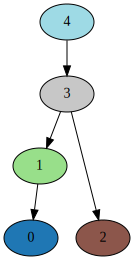

In [6]:
CMGDB_utils.PlotMorseGraph(morse_graph)

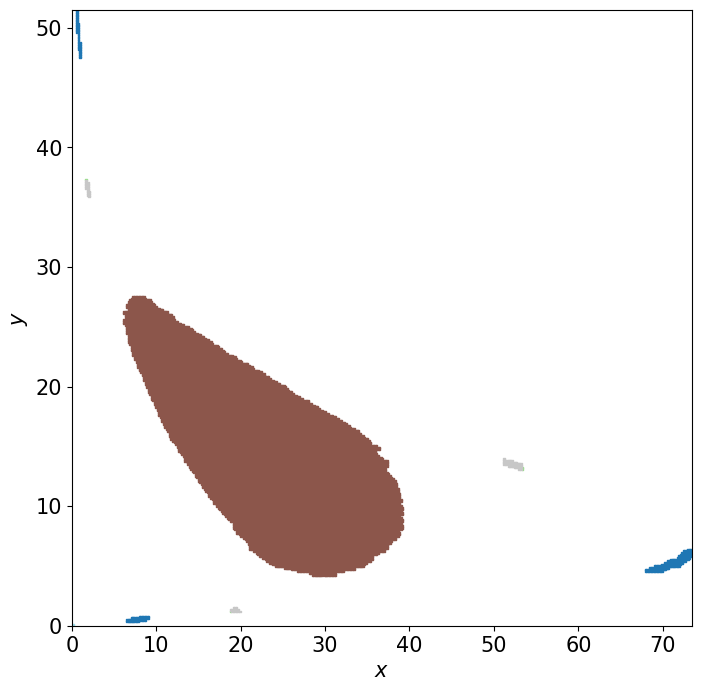

In [7]:
CMGDB_utils.PlotMorseSets(morse_graph, morse_decomp, vertex_mapping, cubical_complex)

### MultiBox map example

Define a multi box map taking a rectangle as input and returning a list of rectangles as output. In the example below we evaluate the map at the center point of the the input rectangle and return a box, with the same size as the input rectangle, containing the image.

In [8]:
def F(box):
    return CMGDB_utils.MultiBoxMap(f, box, mode='center')

Define a model and compute dynamics. Notice that we need to specify the map type as `MultiBoxMap` and that we pad the covering of the image by a layer of cubes.

In [9]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [400, 300]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=True)
# model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='M', padding=True)

In [10]:
%%time
morse_graph, morse_decomp, vertex_mapping, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 8.35 s, sys: 49.8 ms, total: 8.4 s
Wall time: 8.39 s


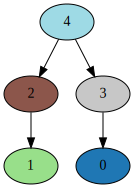

In [11]:
CMGDB_utils.PlotMorseGraph(morse_graph)

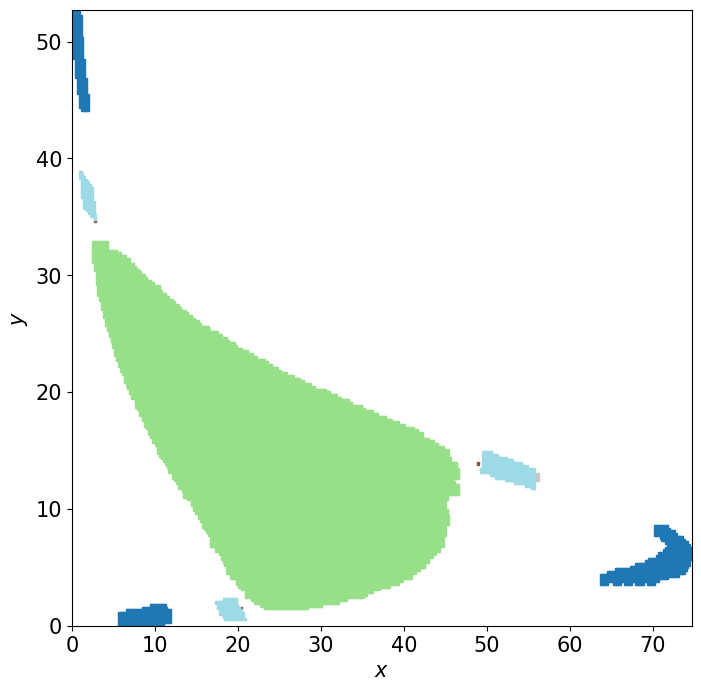

In [12]:
CMGDB_utils.PlotMorseSets(morse_graph, morse_decomp, vertex_mapping, cubical_complex)

## Data examples

We sample random points in the domain and evaluate the Leslie map at those points and use the data to compute dynamics.

In [13]:
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * np.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

In [14]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]

# Sample 5000 points
num_pts = 5000

dim = len(lower_bounds)
X = np.random.uniform(lower_bounds, upper_bounds, size=(num_pts, dim))

Y = np.array([f(x) for x in X])

Define a BoxMap using the data

In [15]:
F = CMGDB_utils.BoxMapData(X, Y)

Define a model and compute dynamics

In [16]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='BoxMap', padding=False)

In [17]:
%%time
morse_graph, morse_decomp, vertex_mapping, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 21.6 s, sys: 150 ms, total: 21.8 s
Wall time: 21.9 s


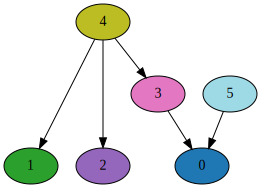

In [18]:
CMGDB_utils.PlotMorseGraph(morse_graph)

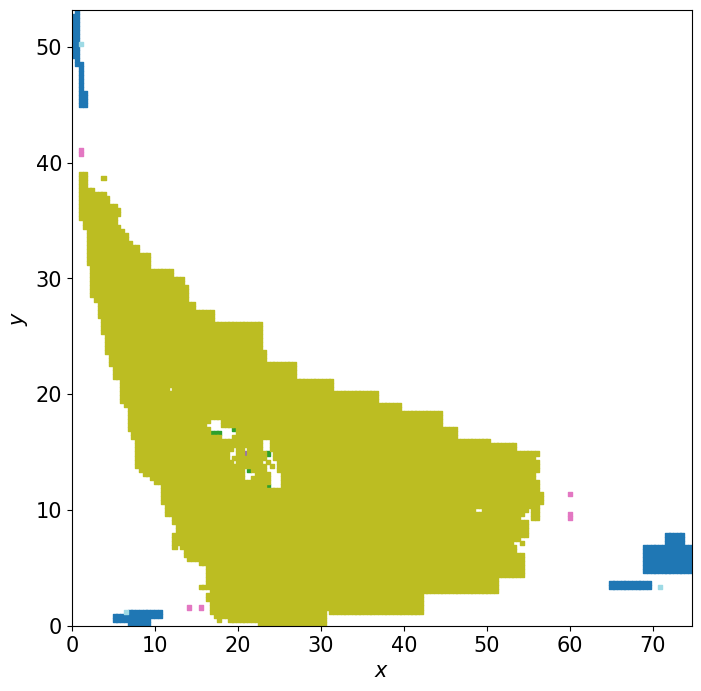

In [19]:
CMGDB_utils.PlotMorseSets(morse_graph, morse_decomp, vertex_mapping, cubical_complex)

### MultiBox data examples

Define a multi box map from data where the size of each rectangle is equal the size of the input rectangle (this is the default).

In [20]:
F = CMGDB_utils.BoxMapData(X, Y, multi_box=True)

Define a model and compute dynamics

In [21]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=False)

In [22]:
%%time
morse_graph, morse_decomp, vertex_mapping, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 21.8 s, sys: 161 ms, total: 22 s
Wall time: 22 s


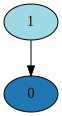

In [23]:
CMGDB_utils.PlotMorseGraph(morse_graph)

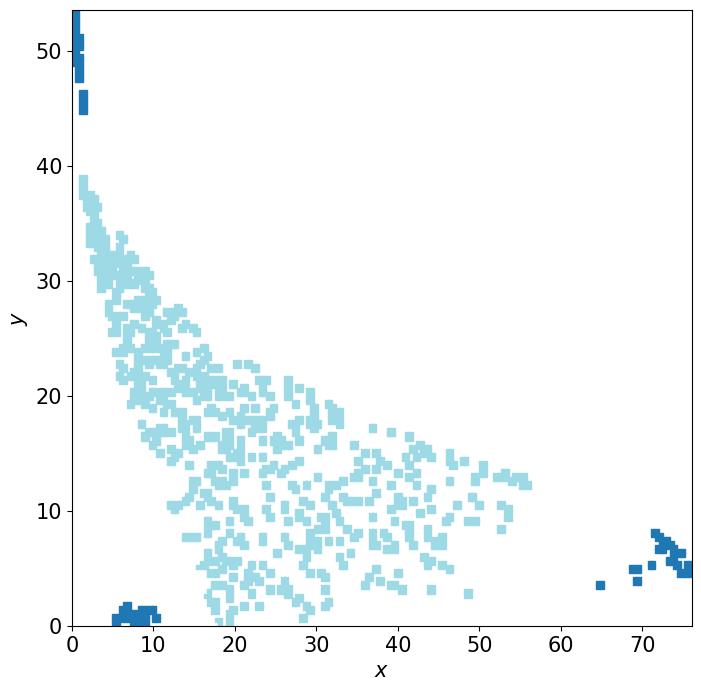

In [24]:
CMGDB_utils.PlotMorseSets(morse_graph, morse_decomp, vertex_mapping, cubical_complex)

### MultiBox map from data with custom sized boxes

Define a multi box map from data with custom sized boxes

In [25]:
F = CMGDB_utils.BoxMapData(X, Y, multi_box=True, box_size=0.5)
# F = CMGDB_utils.BoxMapData(X, Y, multi_box=True, box_size=0)

Define a model and compute dynamics

In [26]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=False)

In [27]:
%%time
morse_graph, morse_decomp, vertex_mapping, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 21.8 s, sys: 174 ms, total: 21.9 s
Wall time: 21.8 s


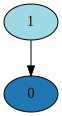

In [28]:
CMGDB_utils.PlotMorseGraph(morse_graph)

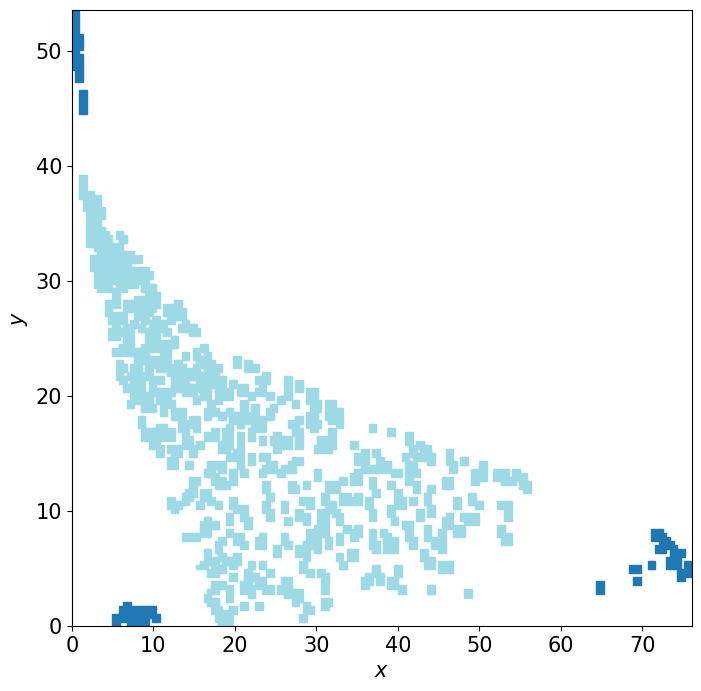

In [29]:
CMGDB_utils.PlotMorseSets(morse_graph, morse_decomp, vertex_mapping, cubical_complex)